# The Evolution of the Game of Thrones Characters

### Task:

1. Pick your favourite GoT characters (if you haven't seen it ask one of your class mates)

2. Rank the relevance of these 5 characters across the 5 books using the criteria you think fits better this situation. The most relevant of the five characters in book1 should get a score of 5 and the less relevant a score of 1, and the same for the rest of the books.

3.  Chart the relevance evolution of the different characters

4. Try to automate as much as possible, do not do things for each book in separate cells and then manually merge, etc.

In [72]:
# Importing libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import IPython
from pyvis.network import Network
import community as community_louvain
from pyvis.network import Network
import seaborn  as sns

%matplotlib inline

In [73]:
# Importing data
data = pd.read_csv('../data/book1.csv')
data

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [74]:
data['Target'].value_counts()

Target
Robert-Baratheon    41
Tyrion-Lannister    41
Sansa-Stark         31
Robb-Stark          22
Tywin-Lannister     20
                    ..
Desmond              1
Hosteen-Frey         1
Jommo                1
Grenn                1
Ulf-son-of-Umar      1
Name: count, Length: 143, dtype: int64

In [75]:
graph = nx.Graph()

In [76]:
for _, edge in data.iterrows():
    graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [77]:
# Checking the number of nodes
print("Total number of nodes: ", int(graph.number_of_nodes()))

Total number of nodes:  187


In [78]:
# Checking the number of edges
print("Total number of edges: ", int(graph.number_of_edges()))

Total number of edges:  684


/Users/nilsjennissen/miniforge3/envs/character-relevance-evolution/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


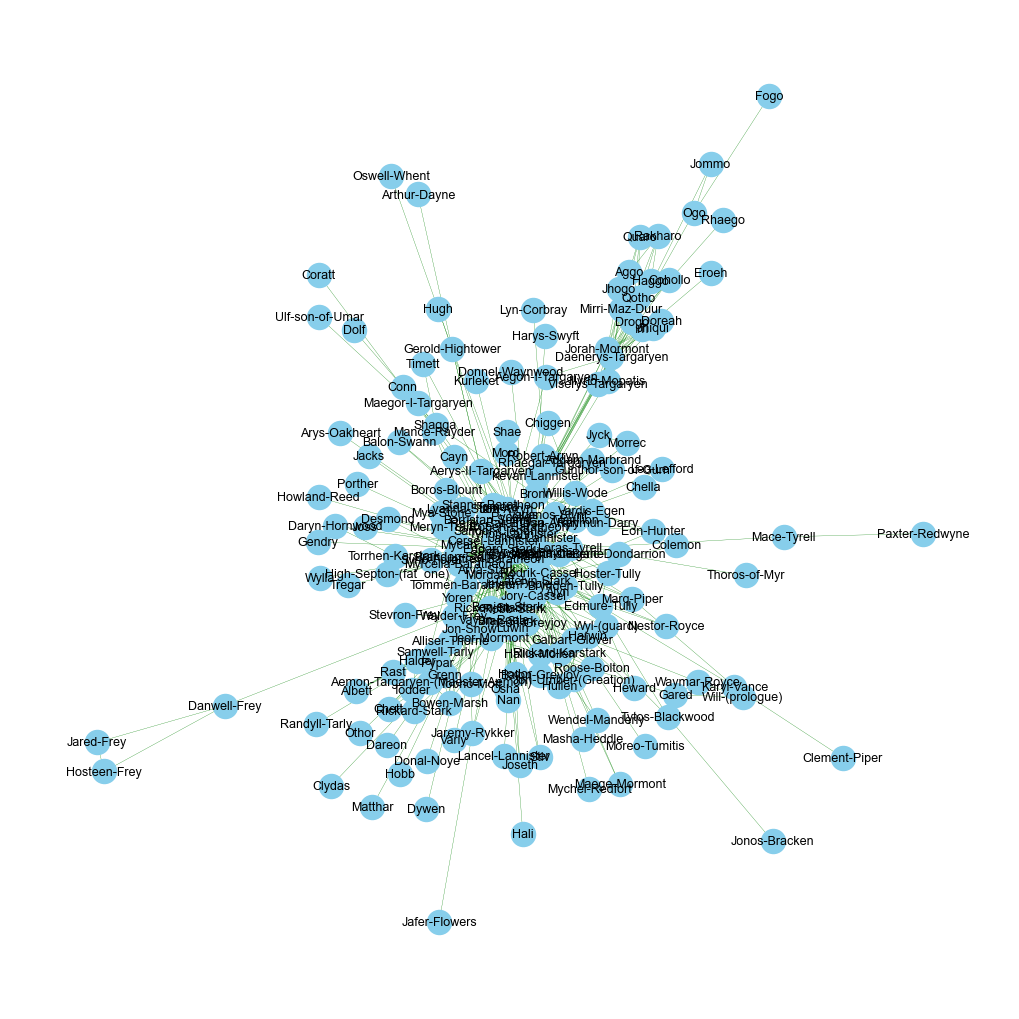

In [79]:
# Visualizing the graph using the default spring layout
plt.figure(figsize =(10, 10))
nx.draw(graph,
           with_labels= True,
           cmap=plt.cm.pink,
            node_color= "skyblue",
            edge_color= "green",
            width= 0.2,
            font_size=9,
            font_color= "black")

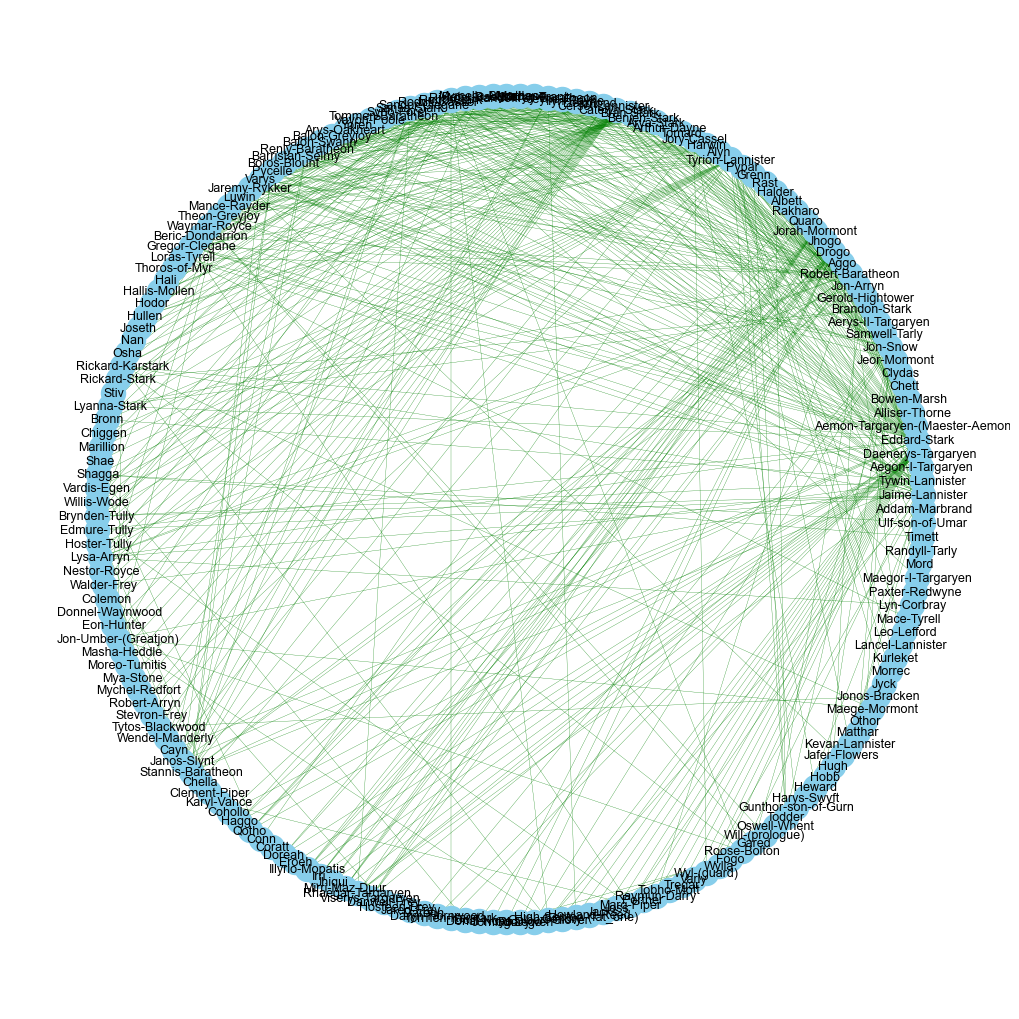

In [80]:
# Visualizing the graph using the circular layout
plt.figure(figsize =(10, 10))
nx.draw_circular(graph,
                   with_labels= True,
                   cmap=plt.cm.pink,
                    node_color= "skyblue",
                    edge_color= "green",
                    width= 0.2,
                    font_size=9,
                    font_color= "black")

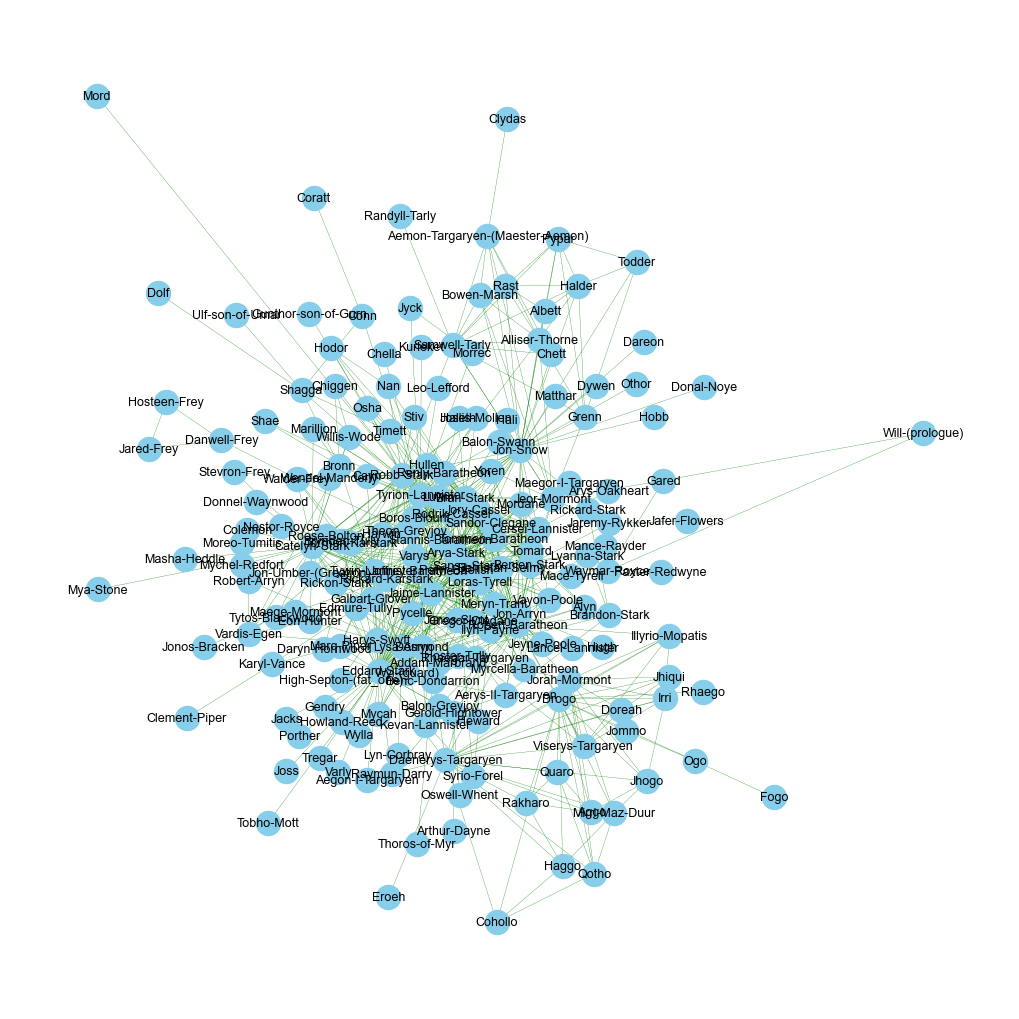

In [81]:
# Visualizing the graph using the random layout
plt.figure(figsize =(10, 10))
nx.draw_kamada_kawai(graph,
               with_labels= True,
               cmap=plt.cm.pink,
                node_color= "skyblue",
                edge_color= "green",
                width= 0.2,
                font_size=9,
                font_color= "black")

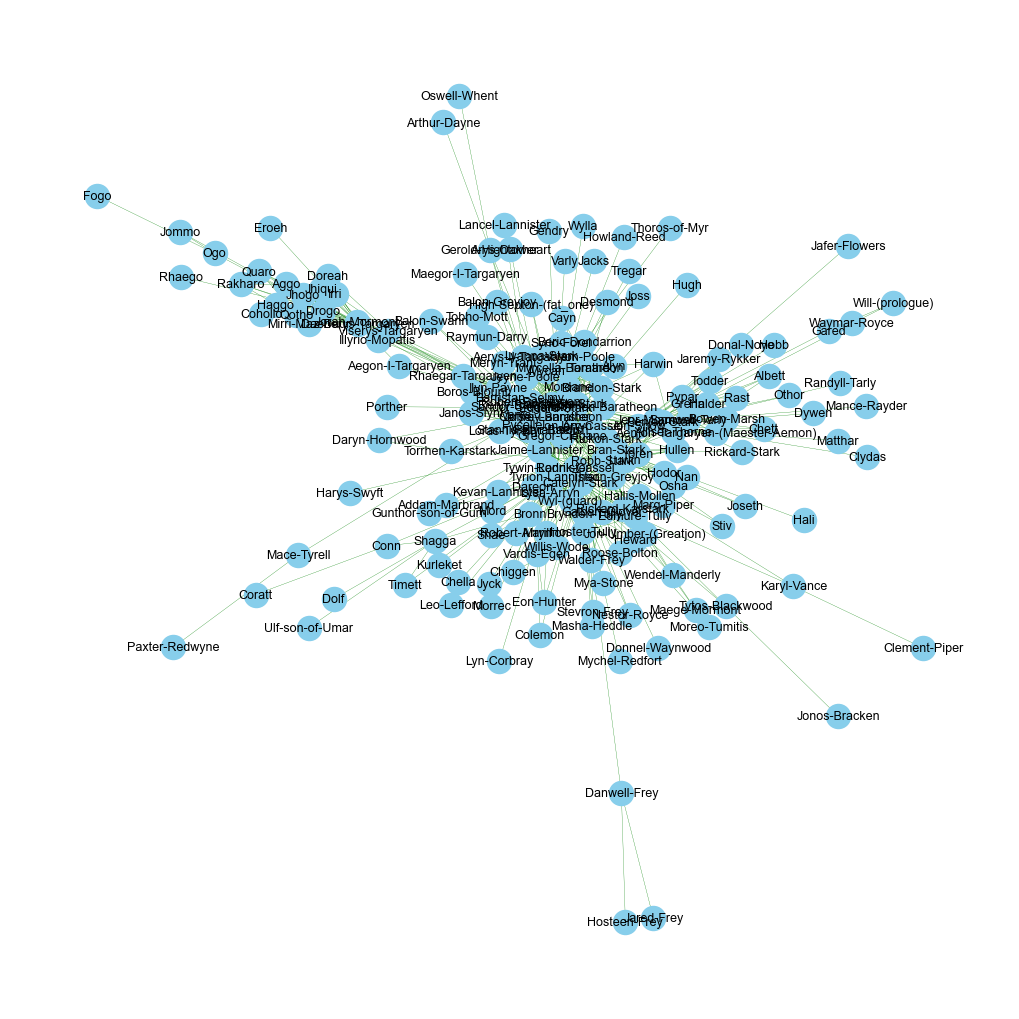

In [82]:
# Visualizing the graph using the spring layout
plt.figure(figsize =(10, 10))
nx.draw_spring(graph,
               with_labels= True,
               cmap=plt.cm.pink,
                node_color= "skyblue",
                edge_color= "green",
                width= 0.2,
                font_size=9,
                font_color= "black")

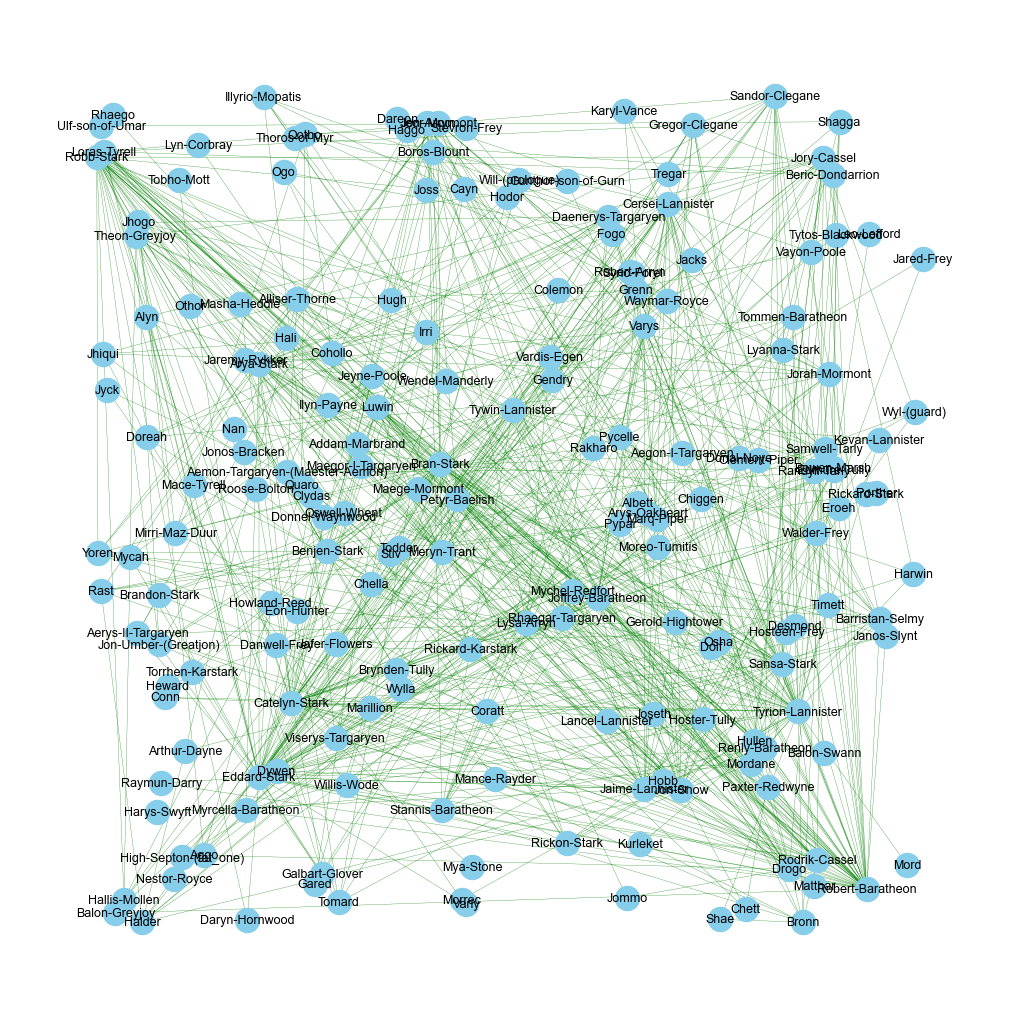

In [83]:
# Visualizing the graph using the random layout
plt.figure(figsize =(10, 10))
nx.draw_random(graph,
               with_labels= True,
               cmap=plt.cm.pink,
                node_color= "skyblue",
                edge_color= "green",
                width= 0.2,
                font_size=9,
                font_color= "black")

In [84]:
# Calculating the degree centrality of book 1
net = Network(notebook=True, height='950px', width='90%', bgcolor='#222222', font_color='white', cdn_resources='in_line')

node_degree = dict(graph.degree())

# set node size and atrributes
nx.set_node_attributes(graph, node_degree, 'Size')

net.toggle_physics(False)

net.from_nx(graph)
net.show_buttons()
net.show("nx.html")

In [62]:
import community as community_louvain
# Calculating the best partition
communities = community_louvain.best_partition(graph)
communities

In [63]:
# Setting the node attributes
nx.set_node_attributes(graph, communities, 'group')

In [64]:
net = Network(notebook=True, height='950px', width='99%', bgcolor='#222222', font_color='white', cdn_resources='remote')

node_degree = dict(graph.degree)

#Setting up node size attribute
nx.set_node_attributes(graph, node_degree, 'size')

net. from_nx(graph)
net.show_buttons()
net. show("nx.html")

In [65]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(graph)

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 10 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print(sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

In [66]:
sorted_deg_cen_book1

In [67]:
deg_cen_book1

In [68]:
measures = [nx.eigenvector_centrality(graph),
            nx.closeness_centrality(graph),
            nx.degree_centrality(graph),
           nx.betweenness_centrality(graph)]

# Creating the correlation DataFrame
cor5 = pd.DataFrame.from_records(measures)

# Calculating the correlation
corr5=cor5.T.corr()
print(corr5)
ax = sns.heatmap(
    corr5,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=360,
    horizontalalignment='right'
);

In [69]:
def process_book(book_number):
    # Read the data
    data = pd.read_csv(f'../data/book{book_number}.csv')

    # Create a graph
    graph = nx.Graph()
    for _, edge in data.iterrows():
        graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

    # Calculate the degree centrality
    deg_cen = nx.degree_centrality(graph)

    # Filter the selected characters
    selected_characters = ['Jon-Snow', 'Eddard-Stark', 'Tyrion-Lannister', 'Arya-Stark', 'Jaime-Lannister']
    filtered_cen = {k: deg_cen[k] for k in selected_characters}

    # Calculate the rank for each character
    rank_series = pd.Series(filtered_cen).rank(ascending=False)
    ranked_cen = rank_series.to_dict()

    # Reverse the ranking order
    reversed_rank = {k: 6 - v for k, v in ranked_cen.items()}

    # Create a DataFrame
    df = pd.DataFrame(reversed_rank, index=[0])

    # Add the book number as a column
    df['book'] = book_number

    return df

In [70]:
# Create a list of DataFrames containing degree centrality
list_of_dataframes = [process_book(book_number) for book_number in range(1, 6)]

# Concatenate the list into a single DataFrame
df = pd.concat(list_of_dataframes)

# X-axis intervals of 1-5
df['book'] = df['book'].astype('category')

# labes on the right side of the plot
ax.yaxis.tick_right()

# Plot the degree centrality evolution
df.plot(x='book')